In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pymysql
import mysql.connector

In [2]:
connection = mysql.connector.connect(
host = '127.0.0.1', 
user = 'root',
password = '52846',
database = 'minicapstoneproject'
)

In [3]:
cursor = connection.cursor()

In [4]:
cursor.execute('SELECT * FROM crime_data')
rows = cursor.fetchall()

In [5]:
for row in (rows):
    print(row)

(10304468, '01-08-2020', '01-08-2020', 'Southwest', 624, 'BATTERY - SIMPLE ASSAULT', 36, 'F', 'SINGLE FAMILY DWELLING', 'AO', '1100 W 39TH PL', 34.01, -118.3)
(190101086, '01-02-2020', '01-01-2020', 'Central', 624, 'BATTERY - SIMPLE ASSAULT', 25, 'M', 'SIDEWALK', 'IC', '700 S HILL ST', 34.05, -118.25)
(191501505, '01-01-2020', '01-01-2020', 'N Hollywood', 745, 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 76, 'F', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'IC', '5400 CORTEEN PL', 34.17, -118.4)
(191921269, '01-01-2020', '01-01-2020', 'Mission', 740, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 31, 'X', 'BEAUTY SUPPLY STORE', 'IC', '14400 TITUS ST', 34.22, -118.45)
(200100502, '01-02-2020', '01-02-2020', 'Central', 442, 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 23, 'M', 'DEPARTMENT STORE', 'IC', '700 S FIGUEROA ST', 34.05, -118.26)
(200100504, '01-04-2020', '01-04-2020', 'Central', 946, 'OTHER MISCELLANEOUS CRIME', 0, 'X', 'POLICE FACILITY', 'IC', '200 E 6TH ST', 34.

In [6]:
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(rows, columns=columns)

In [7]:
print(df)
print(type(df))

         DR_NO   Date_Rptd    DATE_OCC    AREA_NAME  Crm_Cd  \
0     10304468  01-08-2020  01-08-2020    Southwest     624   
1    190101086  01-02-2020  01-01-2020      Central     624   
2    191501505  01-01-2020  01-01-2020  N Hollywood     745   
3    191921269  01-01-2020  01-01-2020      Mission     740   
4    200100502  01-02-2020  01-02-2020      Central     442   
..         ...         ...         ...          ...     ...   
494  200106614  02-07-2020  02-07-2020      Central     624   
495  200106615  02-07-2020  02-07-2020      Central     624   
496  200106616  02-07-2020  02-07-2020      Central     624   
497  200106617  02-07-2020  01-10-2020      Central     510   
498  200106618  02-07-2020  02-03-2020      Central     745   

                                           Crm_Cd_Desc  Vict_Age Vict_Sex  \
0                             BATTERY - SIMPLE ASSAULT        36        F   
1                             BATTERY - SIMPLE ASSAULT        25        M   
2           

In [8]:
# [ 1. Where are the geographical hotspots for reported crimes? ]

cursor.execute('SELECT LAT, LON, COUNT(*) as Crime_Count FROM crime_data WHERE LAT IS NOT NULL AND LON IS NOT NULL GROUP BY LAT, LON LIMIT 100')
rows1 = cursor.fetchall()

columns1 = [i[0] for i in cursor.description]
df1 = pd.DataFrame(rows1, columns=columns1)
print(df1)

      LAT     LON  Crime_Count
0   34.01 -118.30            2
1   34.05 -118.25           75
2   34.17 -118.40            1
3   34.22 -118.45            1
4   34.05 -118.26           95
..    ...     ...          ...
76  34.07 -118.37            1
77  34.11 -118.24            1
78  34.08 -118.35            1
79  34.10 -118.30            1
80  34.14 -118.23            1

[81 rows x 3 columns]


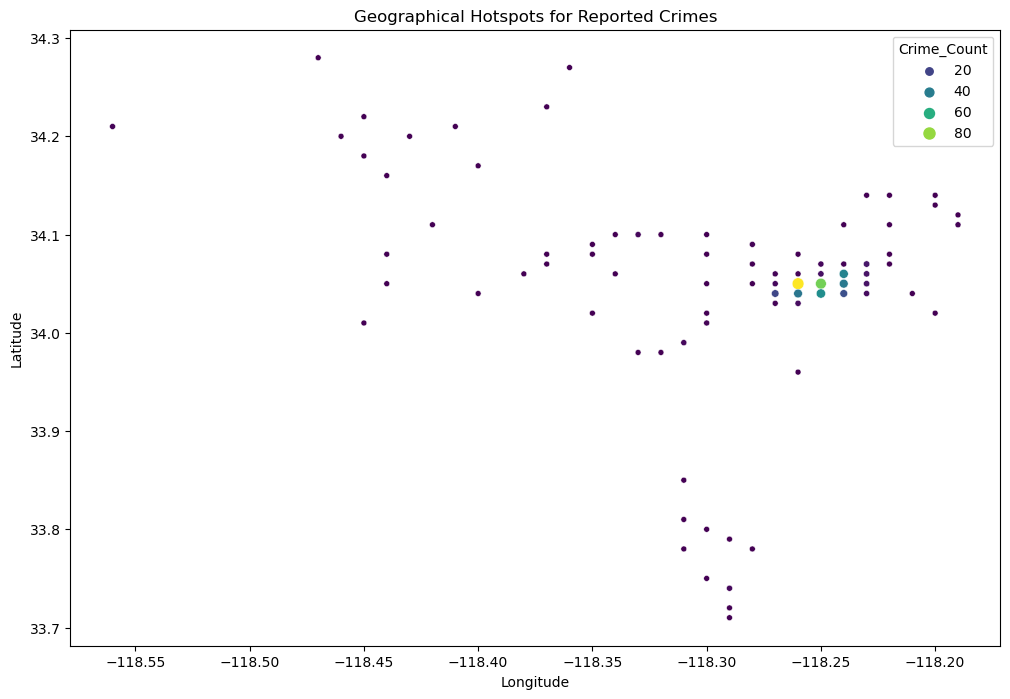

In [9]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='LON', y='LAT', size='Crime_Count', hue='Crime_Count', data=df1, palette='viridis', alpha=1.0)
plt.title('Geographical Hotspots for Reported Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [10]:
# [ 2. What is the distribution of victim ages in reported crimes? ]

cursor.execute('SELECT Vict_Age, COUNT(*) as Age_Count FROM crime_data GROUP BY Vict_Age ')
rows2 = cursor.fetchall()
columns2 = [i[0] for i in cursor.description]
df2 = pd.DataFrame(rows2, columns=columns2)
print(df2)

    Vict_Age  Age_Count
0         36          8
1         25         13
2         76          1
3         31         13
4         23         15
..       ...        ...
61        73          2
62        42          3
63        72          2
64        70          1
65        78          1

[66 rows x 2 columns]


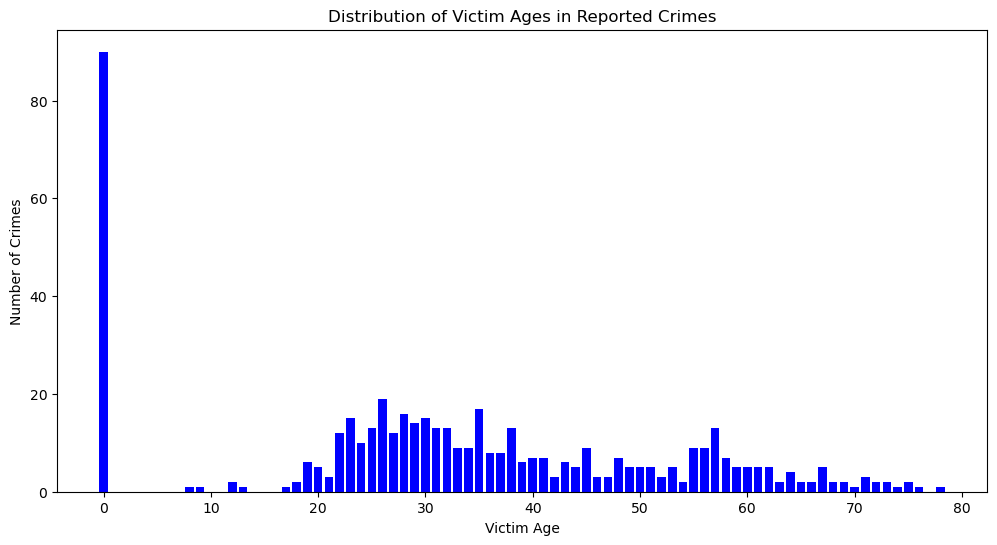

In [11]:
plt.figure(figsize=(12, 6))
plt.bar(df2['Vict_Age'], df2['Age_Count'], color='blue')
plt.title('Distribution of Victim Ages in Reported Crimes')
plt.xlabel('Victim Age')
plt.ylabel('Number of Crimes')
plt.show()

In [12]:
# [ 3. Is there a significant difference in crime rates between male and female victims? ]

cursor.execute("SELECT Vict_Sex, COUNT(*) as Crime_Count FROM crime_data WHERE Vict_Sex IN ('M', 'F') GROUP BY Vict_Sex")
rows3 = cursor.fetchall()

columns3 = [i[0] for i in cursor.description]
df3 = pd.DataFrame(rows3, columns=columns3)

print(df3)

  Vict_Sex  Crime_Count
0        F          155
1        M          278


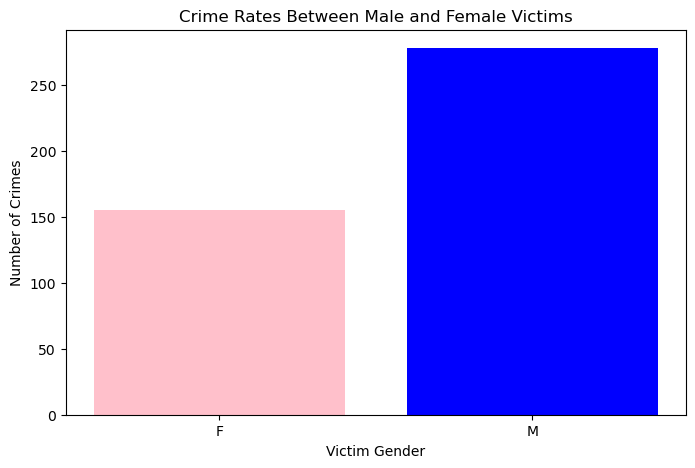

In [13]:
plt.figure(figsize=(8, 5))
plt.bar(df3['Vict_Sex'], df3['Crime_Count'], color=['pink', 'blue'])
plt.title('Crime Rates Between Male and Female Victims')
plt.xlabel('Victim Gender')
plt.ylabel('Number of Crimes')
plt.show()

In [14]:
# [ 4. Where do most crimes occur based on the "Location" column? ]

cursor.execute("SELECT Location, COUNT(*) as Crime_Count FROM crime_data WHERE Location IS NOT NULL GROUP BY Location limit 15")
rows4 = cursor.fetchall()

columns4 = [i[0] for i in cursor.description]
df4 = pd.DataFrame(rows4, columns=columns4)

print(df4)

                Location  Crime_Count
0         1100 W 39TH PL            2
1          700 S HILL ST            1
2        5400 CORTEEN PL            1
3         14400 TITUS ST            1
4      700 S FIGUEROA ST            4
5           200 E 6TH ST            2
6         700 BERNARD ST            1
7       800 N ALAMEDA ST           14
8         800 S OLIVE ST            3
9           700 W 7TH ST           11
10  100 S LOS ANGELES ST            1
11     13600 LEADWELL ST            1
12                   8TH            3
13                  WALL            1
14        800 N BROADWAY            1


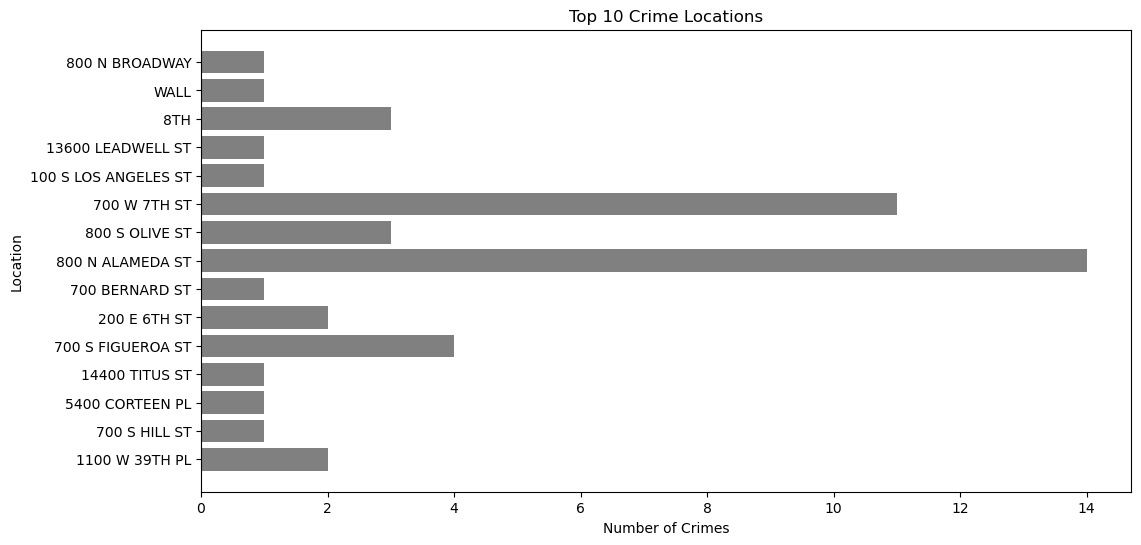

In [15]:
plt.figure(figsize=(12, 6))
plt.barh(df4['Location'], df4['Crime_Count'], color='grey')
plt.title('Top 10 Crime Locations')
plt.xlabel('Number of Crimes')
plt.ylabel('Location')
plt.show()

In [16]:
#[ 5. What is the distribution of reported crimes based on Crime Code?]

cursor.execute("SELECT Crm_Cd, Crm_Cd_Desc, COUNT(*) as Crime_Count FROM crime_data WHERE Crm_Cd IS NOT NULL GROUP BY Crm_Cd, Crm_Cd_Desc ORDER BY Crime_Count asc LIMIT 10")
rows5 = cursor.fetchall()

columns5 = [i[0] for i in cursor.description]
df5 = pd.DataFrame(rows5, columns=columns5)

print(df5)

   Crm_Cd                                        Crm_Cd_Desc  Crime_Count
0     890                                   FAILURE TO YIELD            1
1     820                                    ORAL COPULATION            1
2     343           SHOPLIFTING-GRAND THEFT ($950.01 & OVER)            1
3     649                   DOCUMENT FORGERY / STOLEN FELONY            1
4     755                                         BOMB SCARE            1
5     940                                          EXTORTION            1
6     647                  THROWING OBJECT AT MOVING VEHICLE            1
7     421                 THEFT FROM MOTOR VEHICLE - ATTEMPT            1
8     812  CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...            1
9     920                         KIDNAPPING - GRAND ATTEMPT            1


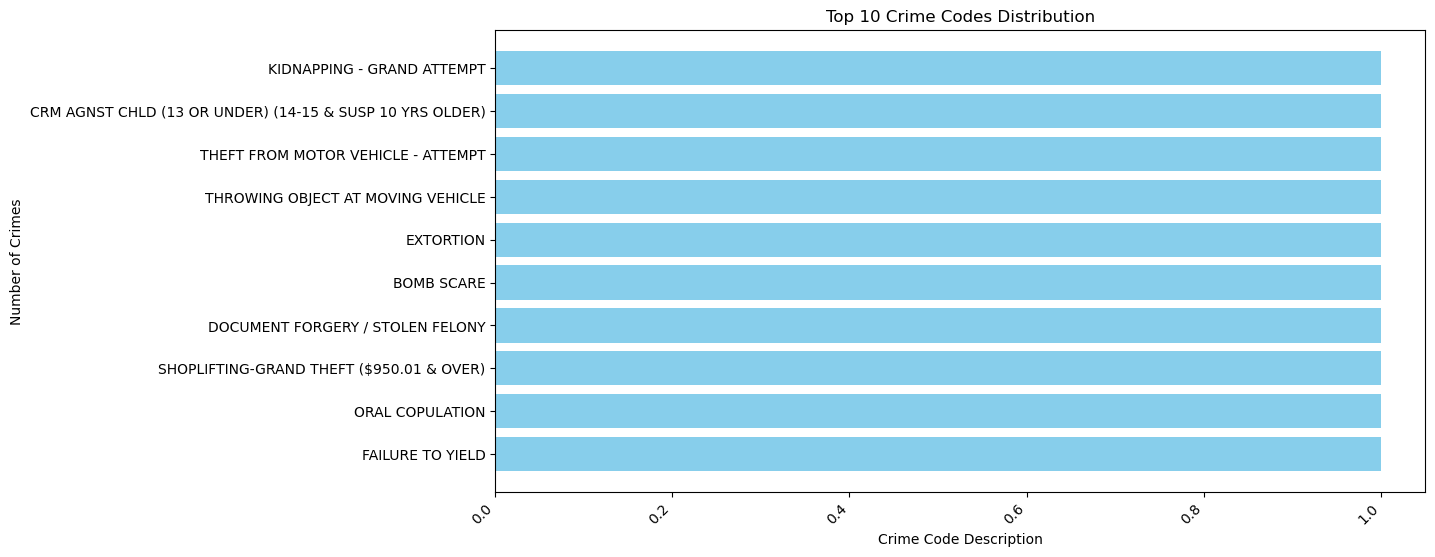

In [17]:
plt.figure(figsize=(12, 6))
plt.barh(df5['Crm_Cd_Desc'], df5['Crime_Count'], color='skyblue')
plt.title('Top 10 Crime Codes Distribution')
plt.xlabel('Crime Code Description')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()